In this project, we’ll apply k-means clustering to our Enron financial data. Our final goal, of course, is to identify persons of interest; since we have labeled data, this is not a question that particularly calls for an unsupervised approach like k-means clustering.

Nonetheless, you’ll get some hands-on practice with k-means in this project, and play around with feature scaling, which will give you a sneak preview of the next lesson’s material.



The starter code can be found in k_means/k_means_cluster.py, which reads in the email + financial (E+F) dataset and gets us ready for clustering. You’ll start with performing k-means based on just two financial features--take a look at the code, and determine which features the code uses for clustering.

Run the code, which will create a scatterplot of the data. Think a little bit about what clusters you would expect to arise if 2 clusters are created.


In [30]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""

import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit



In [31]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [32]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}


the input features we want to use  can be any key in the person-level dictionary (salary, director_fees, etc.) 


In [33]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )

poi, finance_features = targetFeatureSplit( data )



n the "clustering with 3 features" part of the mini-project, you'll want to change this line to 
for f1, f2, _ in finance_features: (as it's currently written, the line below assumes 2 features)

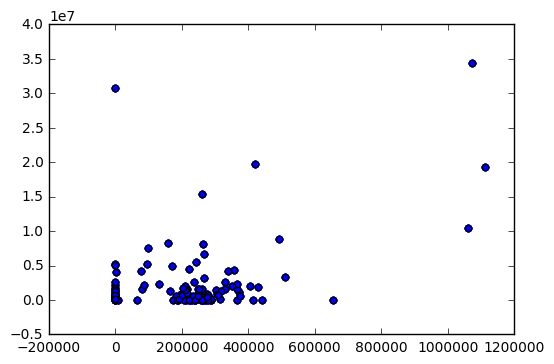

In [34]:

for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()



Deploy k-means clustering on the financial_features data, with 2 clusters specified as a parameter. Store your cluster predictions to a list called pred, so that the Draw() command at the bottom of the script works properly. In the scatterplot that pops up, are the clusters what you expected?

In [35]:


### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, max_iter=100, random_state = None).fit(finance_features, poi)

pred = kmeans.predict(finance_features)


In [36]:
'''
>>> from sklearn.cluster import KMeans
>>> import numpy as np
>>> X = np.array([[1, 2], [1, 4], [1, 0],
...               [4, 2], [4, 4], [4, 0]])
>>> kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
>>> kmeans.labels_
array([0, 0, 0, 1, 1, 1], dtype=int32)
>>> kmeans.predict([[0, 0], [4, 4]])
array([0, 1], dtype=int32)
>>> kmeans.cluster_centers_
array([[ 1.,  2.],
       [ 4.,  2.]])
'''

'\nfrom sklearn.cluster import KMeans\nimport numpy as np\nX = np.array([[1, 2], [1, 4], [1, 0],\n              [4, 2], [4, 4], [4, 0]])\nkmeans = KMeans(n_clusters=2, random_state=0).fit(X)\nkmeans.labels_\narray([0, 0, 0, 1, 1, 1], dtype=int32)\nkmeans.predict([[0, 0], [4, 4]])\narray([0, 1], dtype=int32)\nkmeans.cluster_centers_\narray([[ 1.,  2.],\n       [ 4.,  2.]])\n'

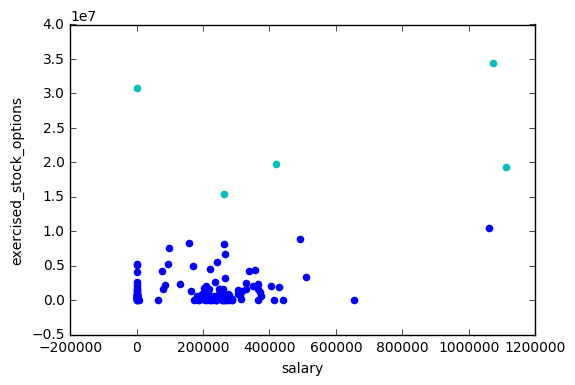

In [37]:

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

Add a third feature to features_list, “total_payments". Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions). Compare the plot with the clusterings to the one you obtained with 2 input features. Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye--it was the k-means algorithm that identified it.

(You'll need to change the code that makes the scatterplot to accommodate 3 features instead of 2, see the comments in the starter code for instructions on how to do this.)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


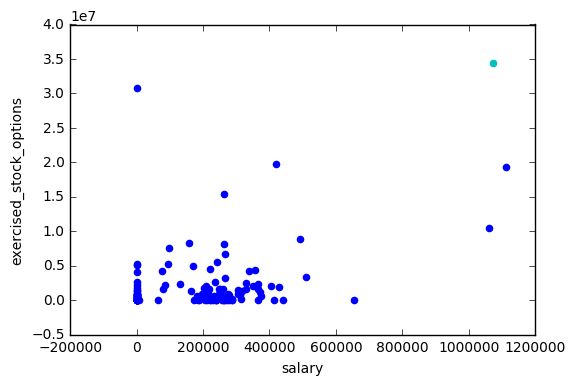

In [38]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = 'total_payments'
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

kmeans = KMeans(n_clusters=2, max_iter=100, random_state = None).fit(finance_features, poi)

pred = kmeans.predict(finance_features)

print pred

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters2.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

In the next lesson, we’ll talk about feature scaling. It’s a type of feature preprocessing that you should perform before some classification and regression tasks. Here’s a sneak preview that should call your attention to the general outline of what feature scaling does.

What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

(NB: if you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)


What are the maximum and minimum values taken by “salary”?

(NB: same caveat as in the last quiz. If you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)


In [39]:
import pandas as pd

df = pd.DataFrame(data_dict).T

feature = 'salary'
df = df[df[feature] != 'NaN']
print df[feature].max()
print df[feature].min()


1111258
477


The plot on the next slide shows the exact same clustering code that you just wrote, but in this example we applied feature scaling before performing the clustering.

We want you to compare the clustering with scaling (on the next slide) with the first clustering visualization you produced, when you used two features in your clustering algorithm.

Notice that now the range of the features has changed to [0.0, 1.0]. That's the only change we've made.

In the next lesson you’ll learn a lot more about what feature scaling means, but for now, just look at the effect on the clusters--which point(s) switch their associated cluster?


In [43]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"

features_list = [poi, feature_1, feature_2]

data = featureFormat(data_dict, features_list)
poi, finance_features = targetFeatureSplit( data )

kmeans = KMeans(n_clusters=2, max_iter=100, random_state = None).fit(finance_features, poi)


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters2.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"
    

IndexError: list index out of range

In [46]:
import pandas as pd
df = pd.DataFrame(data_dict).T
print df.columns
df.head()

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [42]:
from sklearn.preprocessing import MinMaxScaler




print data.keys()
feature_1 = "salary"
feature_2 = "from_messages"
poi  = "poi"

features_list = [poi, feature_1, feature_2]

salary, exercised_stock_options = zip(*finance_features)
salary = np.array(list(salary))
exercised_stock_options = np.array(list(exercised_stock_options))


exercised_stock_options = np.reshape( exercised_stock_options, [len( exercised_stock_options),1])
salary                  = np.reshape( salary, [len( salary),1])

scaler_salary = MinMaxScaler()
salary_ = scaler_salary.fit_transform(salary)

scaler_stock = MinMaxScaler()
stock_ = scaler_stock.fit_transform(exercised_stock_options)

print 20000.0, scaler_salary.transform([200000.])
print 1000000.0, scaler_stock.transform([1000000.0])

#20000.0 [ 0.17997621]
#1000000.0 [ 0.89988104]


AttributeError: 'str' object has no attribute 'keys'

In [47]:
#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data =  np.array([872.23, 23098.34, 23908.23, 1234.98,87230.23, 998.09, 3203.25])
print data

data = np.reshape(data,[len(data),1])
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data)

print
print "min_ :",  scaler.min_
print
print "scale_ :",scaler.scale_
print
print "data_min_ :",scaler.data_min_
print "data_max_ :", scaler.data_max_
print 
print "data_range_ :",scaler.data_range_
print
print data_rescaled
print
print "params: ", scaler.get_params()
print
print "23000. :", scaler.transform([23000.])

[   872.23  23098.34  23908.23   1234.98  87230.23    998.09   3203.25]

min_ : [-0.01010016]

scale_ : [  1.15797031e-05]

data_min_ : [ 872.23]
data_max_ : [ 87230.23]

data_range_ : [ 86358.]

[[ 0.        ]
 [ 0.25737175]
 [ 0.26675004]
 [ 0.00420054]
 [ 1.        ]
 [ 0.00145742]
 [ 0.02699252]]

params:  {'copy': True, 'feature_range': (0, 1)}

23000. : [ 0.25623301]


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


One could argue about whether rescaling the financial data is strictly necessary, perhaps we want to keep the information that a $100,000 salary and $40,000,000 in stock options are dramatically different quantities. What if we wanted to cluster based on “from_messages” (the number of email messages sent from a particular email account) and “salary”? Would feature scaling be unnecessary in this case, or critical?

[array([  3.65788000e+05,   2.90000000e+01]), array([ 267102.,       0.]), array([ 170941.,       0.]), array([  0.,  12.]), array([  2.43293000e+05,   3.20000000e+01]), array([ 267093.,       0.]), array([  0.,  28.]), array([  3.70448000e+05,   4.80000000e+01]), array([    0.,  1073.]), array([ 197091.,     222.])]


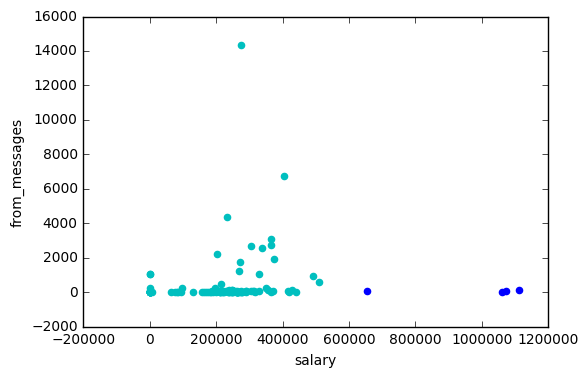

In [52]:
feature_1 = "salary"
feature_2 = "from_messages"
poi  = "poi"
features_list = [poi, feature_1, feature_2,]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

kmeans = KMeans(n_clusters=2, max_iter=100, random_state = None).fit(finance_features, poi)

pred = kmeans.predict(finance_features)


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters2.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"